In [1]:
import numpy as np
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("D:/DataScience/regression/decision tree/Company_Data(1).csv")

In [3]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [4]:
df.shape

(400, 11)

In [5]:
df.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
Sales          400 non-null float64
CompPrice      400 non-null int64
Income         400 non-null int64
Advertising    400 non-null int64
Population     400 non-null int64
Price          400 non-null int64
ShelveLoc      400 non-null object
Age            400 non-null int64
Education      400 non-null int64
Urban          400 non-null object
US             400 non-null object
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [7]:
categorical_col = []
for column in df.columns:
    if df[column].dtype == object and len(df[column].unique()) <= 50:
        categorical_col.append(column)
        print(f"{column} : {df[column].unique()}")
        print("====================================")

ShelveLoc : ['Bad' 'Good' 'Medium']
Urban : ['Yes' 'No']
US : ['Yes' 'No']


In [8]:
df['Sales'] = df.Sales.astype("category").cat.codes

In [9]:
df.Sales.value_counts()

183    4
142    3
243    3
117    3
135    3
      ..
221    1
222    1
224    1
225    1
0      1
Name: Sales, Length: 336, dtype: int64

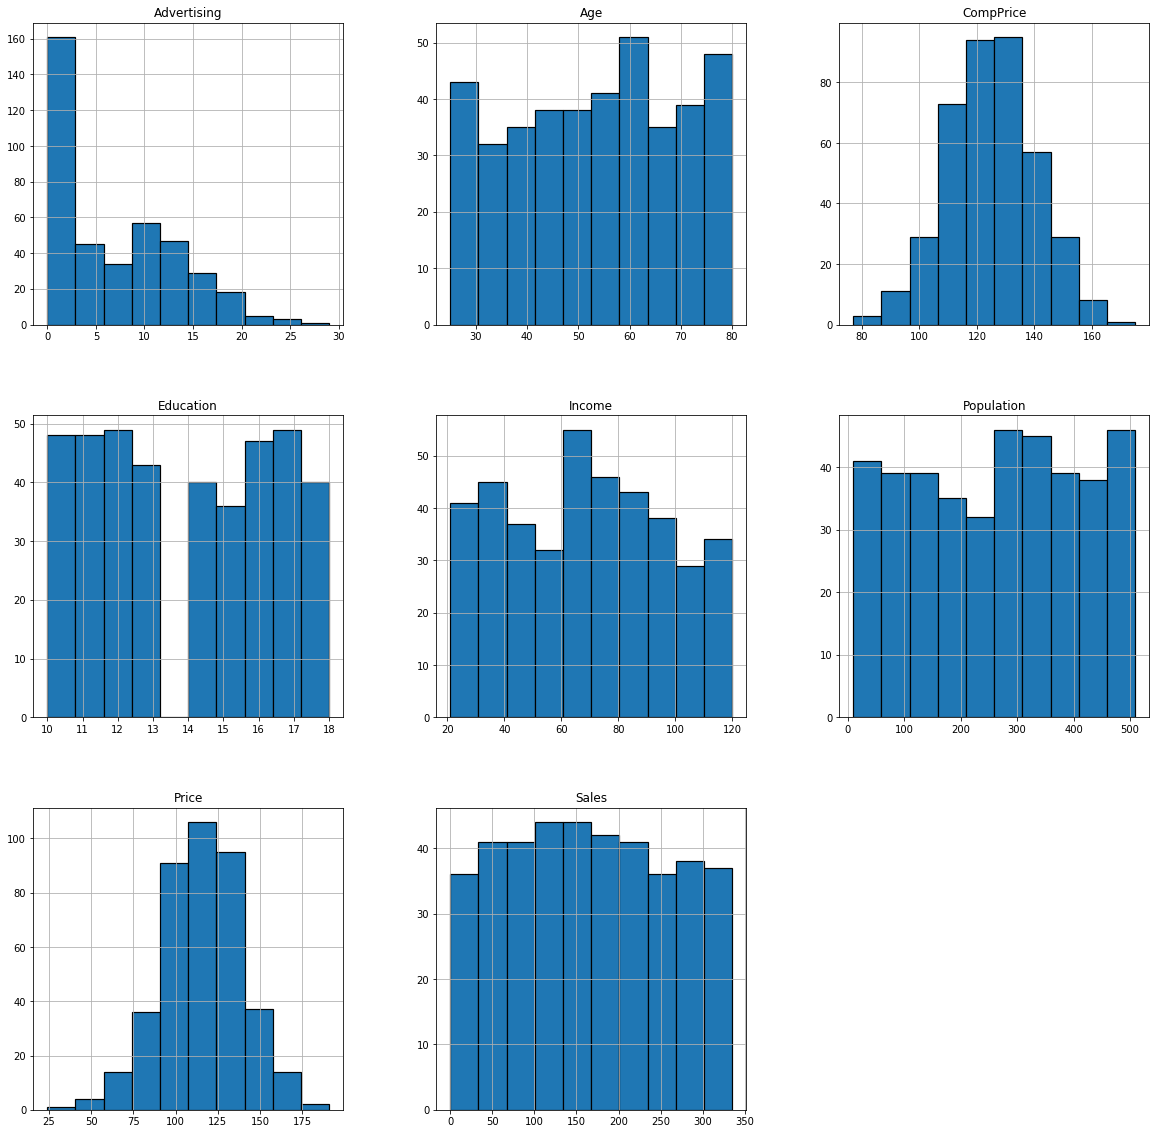

In [10]:
df.hist(edgecolor='black', linewidth=1.2, figsize=(20, 20));

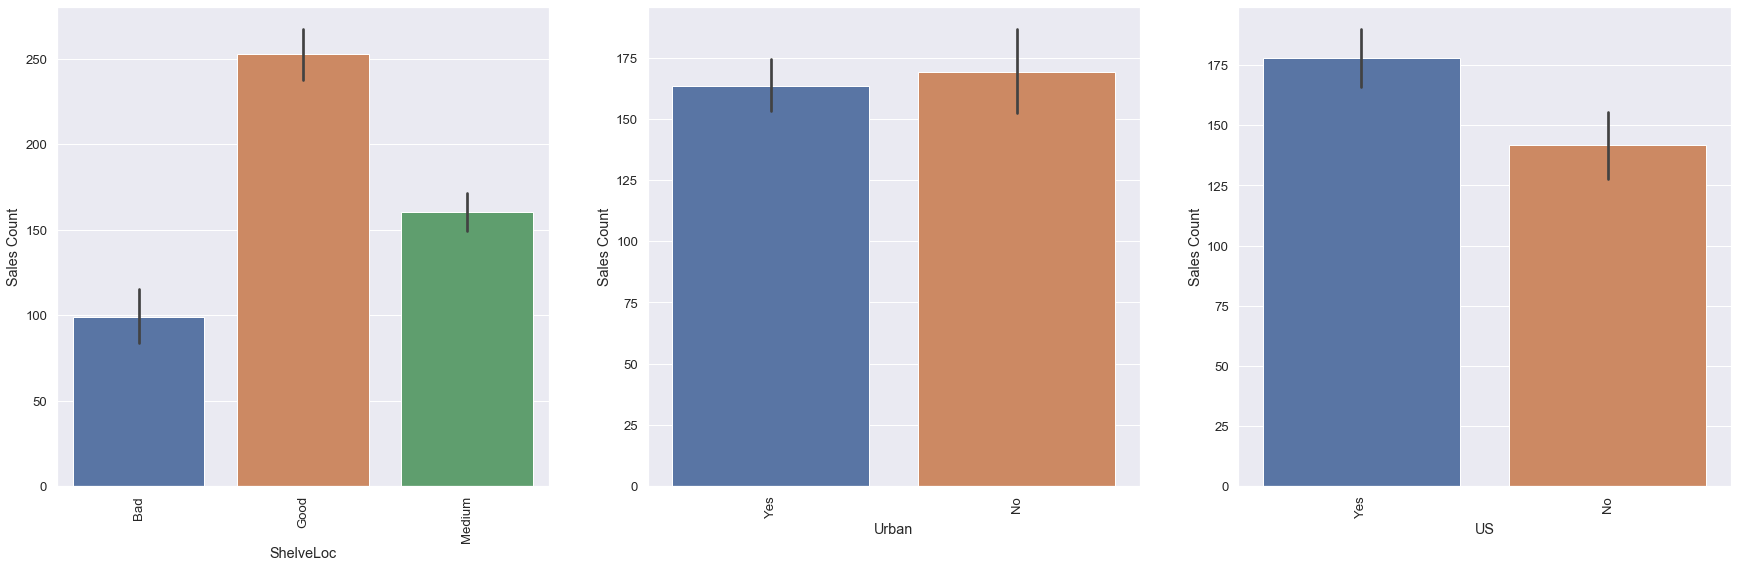

In [11]:
# Plotting how every feature correlate with the "target"
sns.set(font_scale=1.2)
plt.figure(figsize=(30, 30))

for i, column in enumerate(categorical_col, 1):
    plt.subplot(3, 3, i)
    g = sns.barplot(x=f"{column}", y='Sales', data=df)
    g.set_xticklabels(g.get_xticklabels(), rotation=90)
    plt.ylabel('Sales Count')
    plt.xlabel(f'{column}')

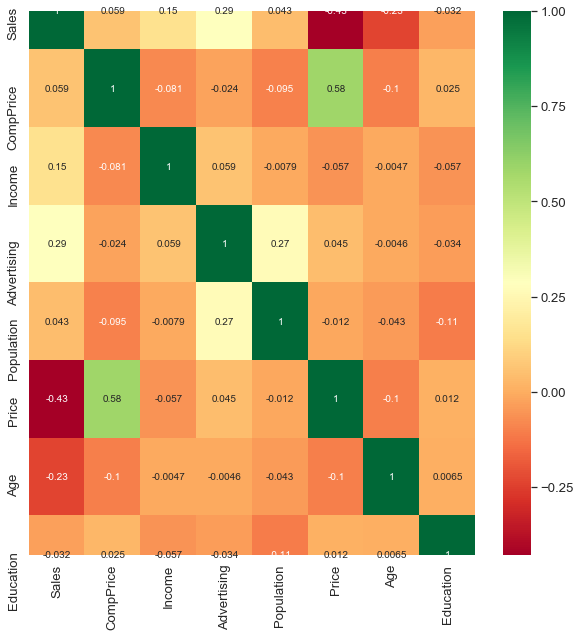

In [12]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True, cmap="RdYlGn", annot_kws={"size":10})

In [13]:
# Transform categorical data into dummies
# data = pd.get_dummies(df, columns=categorical_col)
# data.info()
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
for column in categorical_col:
    df[column] = label.fit_transform(df[column])

In [14]:
X = df.iloc[:, 1:11] 
Y = df.iloc[:, 0] 

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

NameError: name 'y' is not defined

In [ ]:
#train,test = train_test_split(df,test_size = 0.2)

In [ ]:
X_train.head()

In [ ]:
X_test.head()

In [ ]:
from sklearn.tree import DecisionTreeClassifier

from sklearn import tree
plt.figure(figsize=(20,20))
clf_gini = DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=3, min_samples_leaf=5) 
tree.plot_tree(clf_gini.fit(X_train, y_train)) 
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)

In [ ]:
#def prediction(X_test, clf_gini): 
  # Predicton on test with giniIndex 
 #   y_pred = clf_gini.predict(X_test) 
  #  print("Predicted values:") 
   # print(y_pred) 
   # return y_pred 
def prediction(X_test, clf_object): 
  
    # Predicton on test with giniIndex 
    y_pred = clf_object.predict(X_test) 
    print("Predicted values:") 
    print(y_pred) 
    return y_pred 

In [ ]:
def cal_accuracy(y_test, y_pred): 
      
    print("Confusion Matrix: ", 
        confusion_matrix(y_test, y_pred)) 
      
    print ("Accuracy : ", 
    accuracy_score(y_test,y_pred)*100) 
      
    print("Report : ", 
    classification_report(y_test, y_pred)) 

In [ ]:
def train_using_gini(X_train, X_test, y_train): 
    clf_gini = train_using_gini(X_train, X_test, y_train) 

In [ ]:
y_pred_gini = prediction(X_test, clf_gini) 
cal_accuracy(y_test, y_pred_gini)

In [ ]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report ,precision_score

In [ ]:
from sklearn.model_selection import cross_val_predict
#y_test_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

#y_pred_gini = prediction(X_test, clf_gini) 
#y_pred = clf_gini.predict(X_test) 
cal_accuracy(y_test, y_pred)
confusion_matrix(y_test, y_pred)
precision_score(y_test, y_pred)
recall_score(y_test, y_pred_gini)

from sklearn.metrics import f1_score
f1_score(y_test, y_pred_gini)

In [ ]:
#y_pred_entropy = prediction(X_test, clf_entropy) 
#cal_accuracy(y_test, y_pred_entropy) 

In [ ]:
#with Entropy criteria
clf_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 100, 
            max_depth = 3, min_samples_leaf = 5) 

In [ ]:
from sklearn import tree
plt.figure(figsize=(20,18))
clf_entropy.fit(X_train, y_train)
tree.plot_tree(clf_entropy.fit(X_train, y_train)) 
tree = DecisionTreeClassifier(random_state=100)
tree.fit(X_train, y_train)

In [ ]:
def prediction(X_test, clf_entropy): 
  # Predicton on test with giniIndex 
    y_pred = clf_gini.predict(X_test) 
    print("Predicted values:") 
    print(y_pred) 
    return y_pred 

In [ ]:
#y_pred = clf_gini.predict(X_test) 
#print("Predicted values:") 
#print(y_pred) 

In [ ]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report,precision_score

In [ ]:
y_pred_entropy = prediction(X_test, clf_entropy) 
cal_accuracy(y_test, y_pred_entropy) 